In [1]:
!pip install --upgrade scikit-learn==0.20.3 --user

In [2]:
# Get the pydotplus package for visualizing decision trees
!pip install pydotplus

In [3]:
import numpy as np
import pandas as pd

from IPython.display import Image 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *

import sys
sys.path.append("../")
from src.scalers import *
from src.metrics import *

### Load data

In [4]:
dataset = pd.DataFrame(pd.read_csv('../input/digit-recognizer/train.csv'))
dataset = np.array(dataset, dtype='float64')
X, y = dataset[:, 1:], dataset[:, 0, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Decision Tree

> **scaling data is not required**

> **max depth $\approx \log_2 m$, where $m =$ number of features $ = 28 \cdot 28 $**  

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=15, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1)  # find hyperparameters using grid search
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

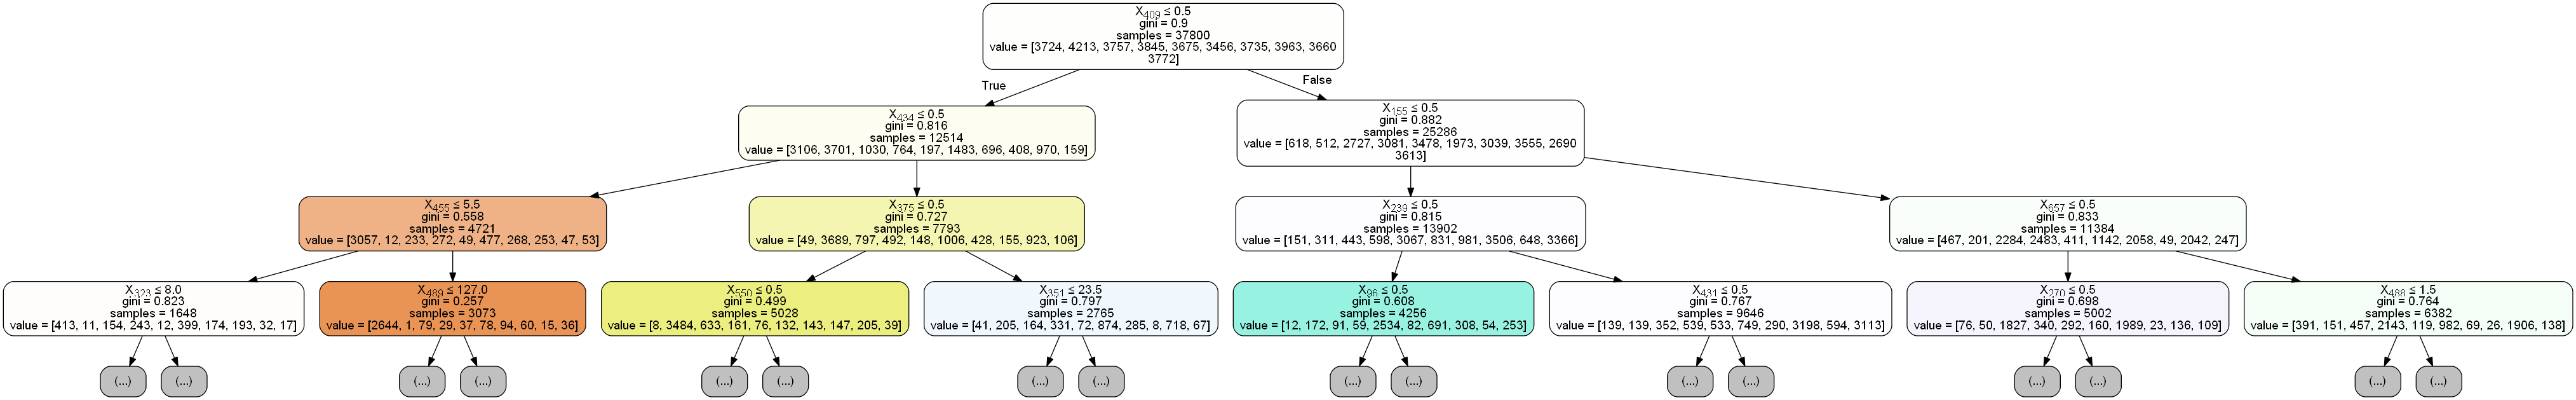

In [6]:
# Convert Decision Tree to visualization
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Create PNG file
Image(graph.create_png())

In [7]:
y_proba = tree_clf.predict_proba(x_test)
y_pred = np.argmax(y_proba, axis=-1)

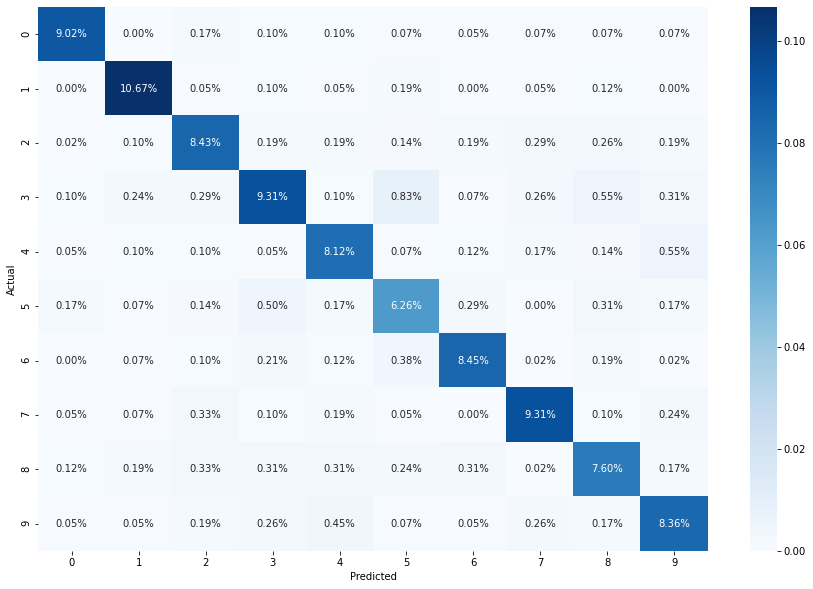

In [8]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [9]:
print(f'Accuracy {accuracy}')

Accuracy 0.8552380952380952


### Scale images

In [10]:
scaler = StandardScaler()

x_train_scaler = scaler.fit(x_train)
x_train = x_train_scaler.transform(x_train)
x_test = x_train_scaler.transform(x_test)

## k-Nearest Neighbors

> **scaling data is preferred**

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(x_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
y_proba = knn_clf.predict_proba(x_test)
y_pred = np.argmax(y_proba, axis=-1)

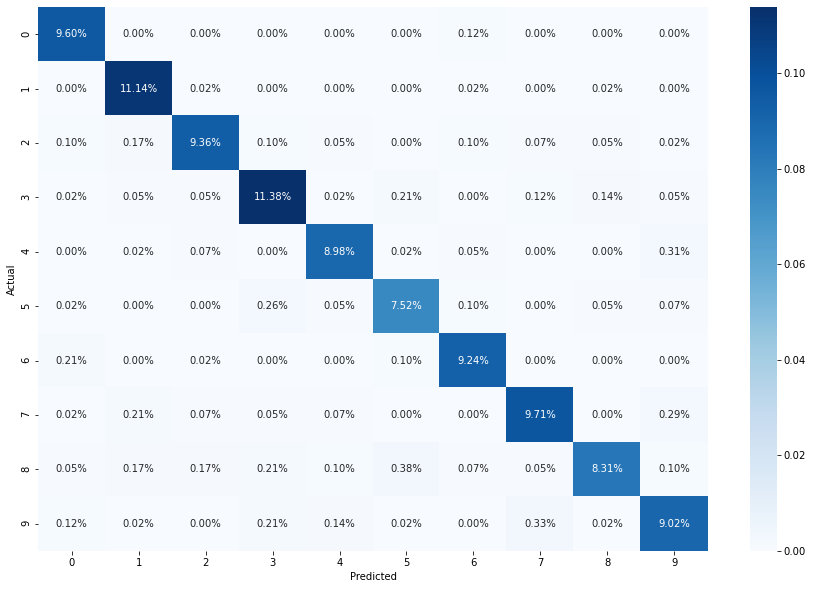

In [13]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [14]:
print(f'Accuracy {accuracy}')

Accuracy 0.9426190476190476


## Naive Bayes

* **Gaussian Naive Bayes**

In [15]:
gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred = gnb_clf.predict(x_test)

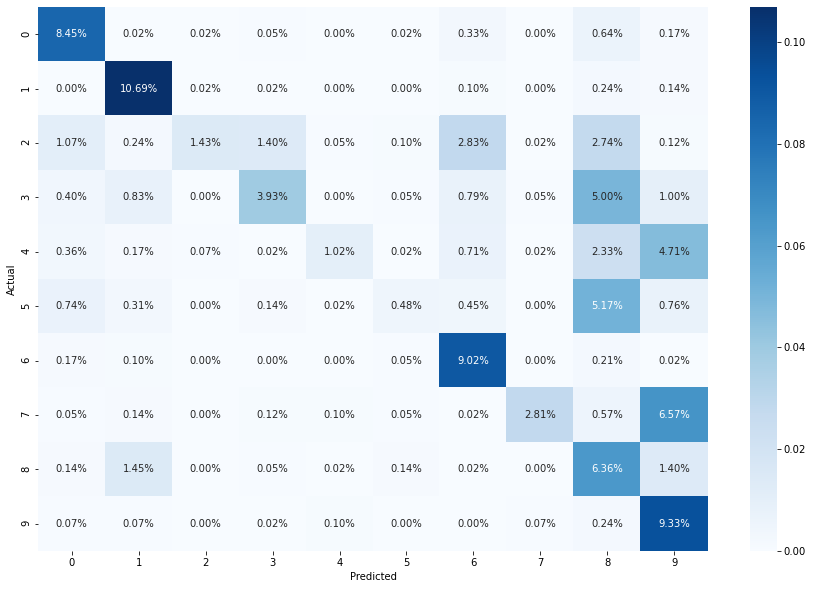

In [17]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [18]:
print(f'Accuracy {accuracy}')

Accuracy 0.5352380952380953


* **Multinomial Naive Bayes**

In [19]:
mnb_clf = MultinomialNB()
mnb_clf.fit(np.round(x_train_scaler.inverse_transform(x_train)), y_train.ravel()) #  X values must be non-negative

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
y_pred = mnb_clf.predict(x_train_scaler.inverse_transform(x_test))

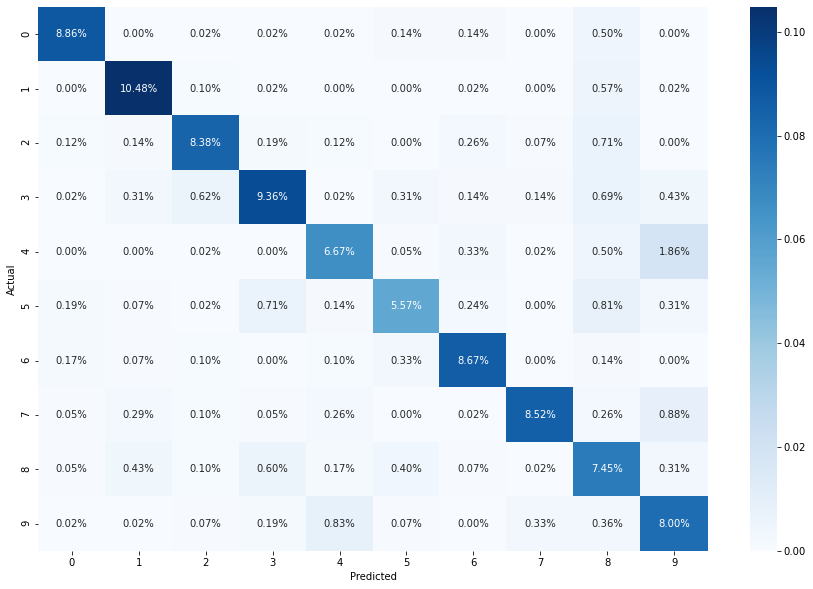

In [21]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [22]:
print(f'Accuracy {accuracy}')

Accuracy 0.8195238095238095


* **Bernoulli Naive Bayes**

In [23]:
bnb_clf = BernoulliNB()
bnb_clf.fit(x_train, y_train.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
y_pred = bnb_clf.predict(x_test)

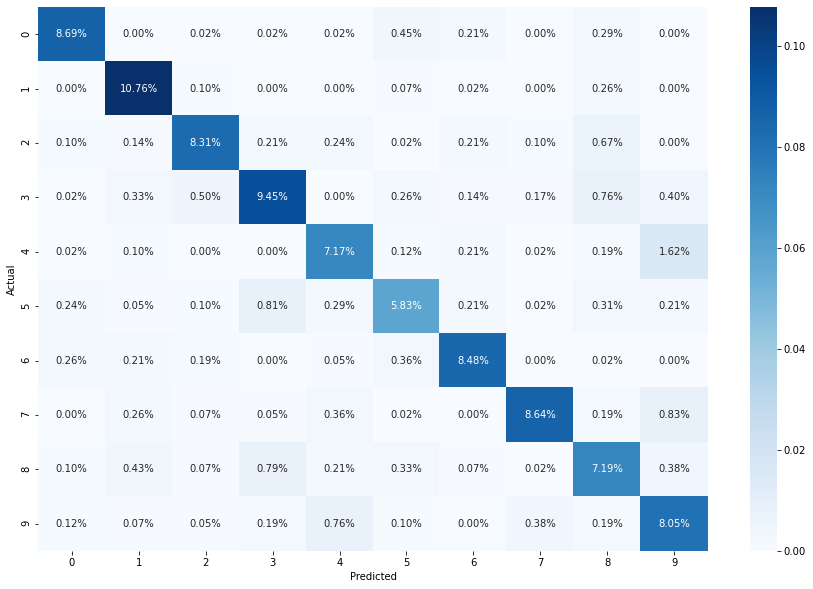

In [25]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [26]:
print(f'Accuracy {accuracy}')

Accuracy 0.8257142857142857
